In [2]:
#!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 42kB/s 
     |████████████████████████████████| 3.8MB 41.3MB/s 
     |████████████████████████████████| 512kB 53.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b73b468128e4ca96a26a6e68874031c776ae67b6d99277b12a7ac68e7332f23f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [1]:
from numpy.random import seed
seed(8) 
from tensorflow import set_random_seed
set_random_seed(7) 

import numpy as np 
import pandas as pd 

import os

!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
!unzip Covid_Data_GradientCrescent.zip

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
154MB [00:00, 177MB/s]
Archive:  Covid_Data_GradientCrescent.zip
   creating: all/
   creating: all/test/
   creating: all/test/covid/
  inflating: all/test/covid/nejmoa2001191_f3-PA.jpeg  
  inflating: all/test/covid/nejmoa2001191_f4.jpeg  
  inflating: all/test/covid/nejmoa2001191_f5-PA.jpeg  
  inflating: all/test/covid/radiol.2020200490.fig3.jpeg  
  inflating: all/test/covid/ryct.2020200028.fig1a.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig2.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day0.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day4.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day7.jpeg  
   creating: all/test/normal/
  inflating: all/test/normal/NORMAL2-IM-1385-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1396-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1400-0001.jpeg  
  inflating: all/

In [2]:
print(os.listdir("/content/"))

#Print and remove zips once done

!rm Covid_Data_GradientCrescent.zip

['.config', 'two', 'Covid_Data_GradientCrescent.zip', 'all', 'sample_data']


In [0]:
#Enable this cell to remove viral pneumonia class. Remember to Change model's final layer to 3 neurons.
!rm -rf /content/all/test/pneumonia_vir

!rm -rf /content/all/train/pneumonia_vir

In [4]:
from os import listdir
data_list = listdir('/content/all/train')

#Delete some classes that may interfere
data_list

['pneumonia_bac', 'covid', 'normal']

In [0]:
import os
import sys
import numpy as np
import keras.backend as K
import tensorflow as tf
from keras.layers import Input, Lambda, Activation,Conv2D, Add, ZeroPadding2D, UpSampling2D, Concatenate, MaxPooling2D,Dense,Dropout,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from functools import wraps
import matplotlib.pyplot as plt
from PIL import Image
from keras import layers
import keras
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
DATASET_PATH  = '/content/all/train'
test_dir =  '/content/all/test'
IMAGE_SIZE    = (150, 150)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 16  
NUM_EPOCHS    = 100
LEARNING_RATE =0.0001

#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                    fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"
                                                 
                                                  )


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 160 images belonging to 3 classes.
Found 40 images belonging to 3 classes.


In [32]:
from keras import models
from keras import layers
from keras import optimizers
import keras
inputs= Input(shape=(150,150,3))
base_model= keras.applications.InceptionV3(include_top=False,weights=None, input_tensor= inputs)

x1=  base_model.get_layer('mixed3').output
x2=  base_model.get_layer('mixed4').output

x4= Conv2D(64,(3,3), activation= 'relu',strides=(2,2))(x1)
x5= Conv2D(96,(3,3), activation= 'relu',strides=(2,2))(x1)
x8= Conv2D(64,(3,3),activation= 'relu',strides=(2,2))(x2)
x9= Conv2D(96,(3,3),activation= 'relu',strides=(2,2))(x2)

X= Concatenate()([x4,x5,x8,x9])
X= Flatten()(X)
X= Dense(256, activation='relu')(X)
X= Dense(3, activation='softmax')(X)
model= Model(inputs, X)
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=LEARNING_RATE),metrics=['acc'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_717 (Conv2D)             (None, 74, 74, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_659 (BatchN (None, 74, 74, 32)   96          conv2d_717[0][0]                 
__________________________________________________________________________________________________
activation_659 (Activation)     (None, 74, 74, 32)   0           batch_normalization_659[0][0]    
____________________________________________________________________________________________

In [33]:
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,                        
                       )

10
3


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
10/10 [==============================] - 8s 774ms/step - loss: 1.1899 - acc: 0.4500 - val_loss: 1.1025 - val_acc: 0.3750
Epoch 2/100
10/10 [==============================] - 3s 277ms/step - loss: 0.8345 - acc: 0.6625 - val_loss: 1.0994 - val_acc: 0.4167
Epoch 3/100
10/10 [==============================] - 4s 374ms/step - loss: 0.7309 - acc: 0.7063 - val_loss: 1.1841 - val_acc: 0.3333
Epoch 4/100
10/10 [==============================] - 4s 430ms/step - loss: 0.8930 - acc: 0.6375 - val_loss: 1.3033 - val_acc: 0.3438
Epoch 5/100
10/10 [==============================] - 4s 441ms/step - loss: 0.9420 - acc: 0.6187 - val_loss: 1.1148 - val_acc: 0.3333
Epoch 6/100
10/10 [==============================] - 4s 374ms/step - loss: 0.7106 - acc: 0.7375 - val_loss: 1.2124 - val_acc: 0.3750
Epoch 7/100
10/10 [==============================] - 4s 430ms/step - loss: 0.6399 - acc: 0.7375 - val_loss: 1.1437 - val_acc: 0.3438
Epoch 8/100
10/10 [==============================] - 4s 432ms/step - 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


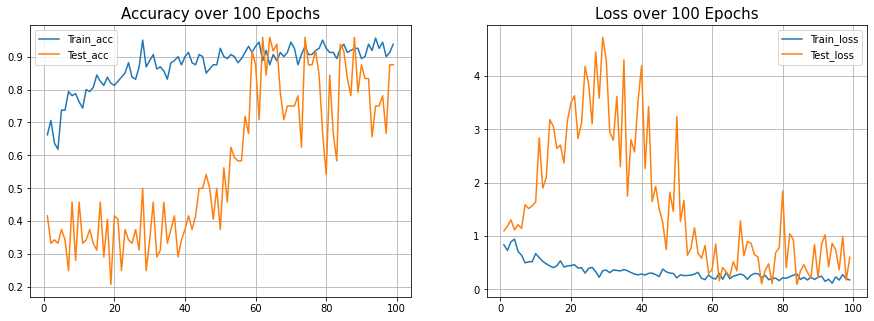

In [34]:
import matplotlib.pyplot as plt
def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 100)

In [0]:
#model.save('Covid_Multi.h5')

In [36]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=True,
        seed=42,
        
        class_mode="categorical")
eval_generator.reset()

Found 27 images belonging to 3 classes.


In [39]:
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )
print('Test loss:' , x[0])
print('Test accuracy:',x[1])


2/2 [==============================] - 0s 39ms/step
Test loss: 0.0005974177038297057
Test accuracy: 1.0
